In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Data
data = pd.read_csv("ToyotaCorolla - MLR.csv")
# Data description
# The dataset consists of the following variables:
# 1.Age: Age in years
# 2.KM: Accumulated Kilometers on odometer
# 3.FuelType: Fuel Type (Petrol, Diesel, CNG)
# 4.HP: Horse Power
# 5.Automatic: Automatic ( (Yes=1, No=0)
# 6.CC: Cylinder Volume in cubic centimeters
# 7.Doors: Number of doors
# 8.Weight: Weight in Kilograms
# 9.Gears  
# 10.Price: Offer Price in EUROs


In [3]:
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [4]:
data.info()
# No null value is present in the data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
# Renaming columns as per for our convenience
#changing name for Age column
data1 = data.rename({'Age_08_04':'Age'},axis = 1)
data1.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [6]:
#changing name for fuel column
data2 = data1.rename({'Fuel_Type':'Fuel'},axis=1)
data2.head()

,Price,Age,KM,Fuel,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [7]:
# checking for duplicate rows
data2[data2.duplicated(keep=False)]

,Price,Age,KM,Fuel,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
112,24950,8,13253,Diesel,116,0,2000,5,4,5,1320
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [8]:
# There are only two duplicate columns , so we will simply drop one of them.
data2 = data2.drop_duplicates(keep='first')


In [9]:
data2.shape
#one column has been successfully removed

(1435, 11)

In [10]:
# checking again for duplicated column
data2[data2.duplicated(keep=False)]
# No duplicate columns found

,Price,Age,KM,Fuel,HP,Automatic,cc,Doors,Cylinders,Gears,Weight


<Axes: xlabel='Price'>

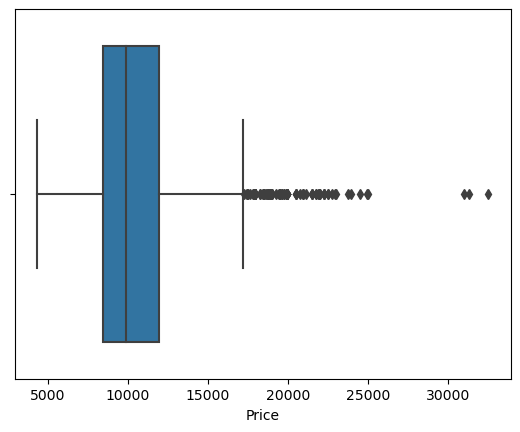

In [11]:
# Oulier Detection
#Checking for outlier in the price column
sns.boxplot(x = data2['Price'])
#Outliers detected

<Axes: xlabel='Price', ylabel='Count'>

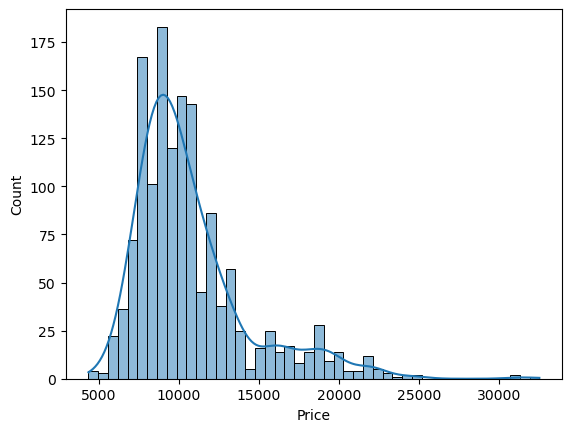

In [12]:
sns.histplot(data2['Price'],kde = True)

In [13]:
data2['Price'].skew()

1.6965785809803777

In [14]:
# As data is highly skewed , we will IQR method for outlier detection and removal
# Finding the IQR
percentile25_price = data2['Price'].quantile(0.25)
percentile75_price = data2['Price'].quantile(0.75)
iqr_price = percentile75_price - percentile25_price

In [15]:
#Finding upper and lower limit
upper_limit_price = percentile75_price + 1.5*iqr_price
lower_limit_price = percentile25_price - 1.5*iqr_price
print("Upper Limit",upper_limit_price)
print("Lower Limit",lower_limit_price)

Upper Limit 17200.0
Lower Limit 3200.0


In [16]:
#Finding Outliers
data2[data2['Price']>upper_limit_price]
# For upper limit we have 109 ouliers

,Price,Age,KM,Fuel,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
7,18600,30,75889,Diesel,90,0,2000,3,4,5,1245
8,21500,27,19700,Petrol,192,0,1800,3,4,5,1185
10,20950,25,31461,Petrol,192,0,1800,3,4,6,1185
11,19950,22,43610,Petrol,192,0,1800,3,4,6,1185
12,19600,25,32189,Petrol,192,0,1800,3,4,6,1185
...,...,...,...,...,...,...,...,...,...,...,...
182,21125,2,225,Petrol,97,0,1400,5,4,5,1110
183,21500,2,15,Petrol,110,0,1600,5,4,5,1130
184,17795,1,1,Petrol,98,0,1400,4,4,5,1100
185,18245,1,1,Petrol,110,0,1600,5,4,5,1075


In [17]:
#outlier for lower limits
data2[data2['Price']<lower_limit_price]
# No outliers are present as per lower limit

,Price,Age,KM,Fuel,HP,Automatic,cc,Doors,Cylinders,Gears,Weight


In [18]:
#Capping the ouliers
data3 = data2.copy()

In [19]:
data3['Price'] = np.where(
    data3['Price']>upper_limit_price,
    upper_limit_price,
    np.where(
        data3['Price']<lower_limit_price,lower_limit_price,
        data3['Price']
    )
)

C:\Users\singh\AppData\Local\Temp\ipykernel_2584\3465508536.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['Price'])
C:\Users\singh\AppData\Local\Temp\ipykernel_2584\3465508536.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data3['Price'])


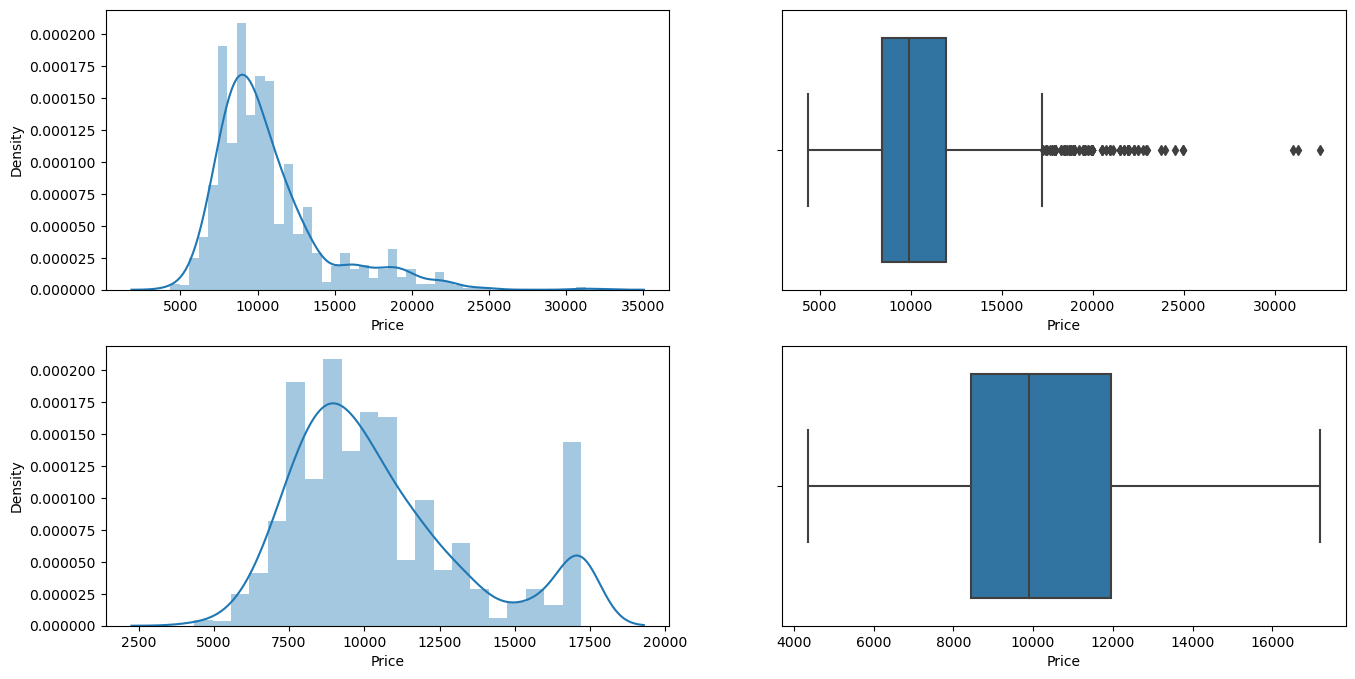

In [20]:
# Compairing the old and new price column after outlier removal
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.distplot(data2['Price'])

plt.subplot(2,2,2)
sns.boxplot(x = data2['Price'])

plt.subplot(2,2,3)
sns.distplot(data3['Price'])

plt.subplot(2,2,4)
sns.boxplot(x = data3['Price'])

plt.show()

# we have successfully removed the outliers from Price column

In [21]:
data3.head()

,Price,Age,KM,Fuel,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500.0,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750.0,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950.0,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950.0,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750.0,30,38500,Diesel,90,0,2000,3,4,5,1170


<Axes: xlabel='Age'>

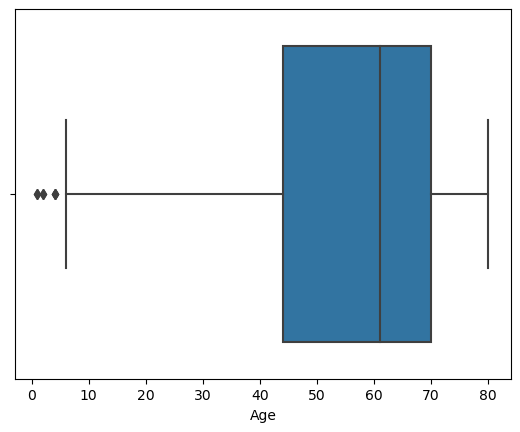

In [22]:
# Outlier detection for Age column
sns.boxplot(x=data3['Age'])

<Axes: xlabel='Age', ylabel='Count'>

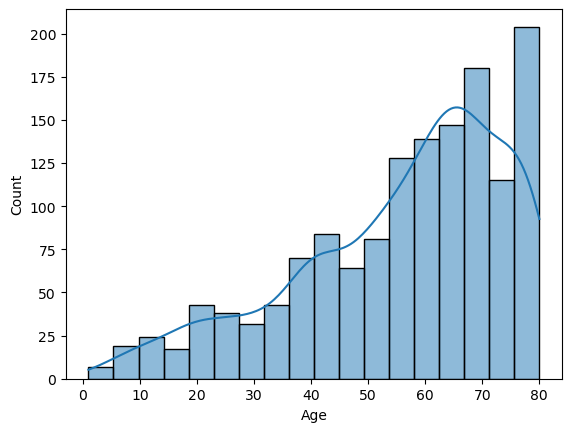

In [23]:
sns.histplot(data3['Age'],kde=True)

In [24]:
data3['Age'].skew()

-0.8255666018465969

In [25]:
# As data skewed we will use IQR method for outlier detection
# Finding the IQR
percentile25_age = data3['Age'].quantile(0.25)
percentile75_age = data3['Age'].quantile(0.75)
iqr_age = percentile75_age - percentile25_age

In [26]:
#Finding upper and lower limit
upper_limit_age = percentile75_age + 1.5*iqr_age
lower_limit_age = percentile25_age - 1.5*iqr_age
print("Upper Limit",upper_limit_age)
print("Lower Limit",lower_limit_age)

Upper Limit 109.0
Lower Limit 5.0


In [27]:
#Finding Outliers
data3[data3['Age']>upper_limit_age]
# For upper limit we have no ouliers

,Price,Age,KM,Fuel,HP,Automatic,cc,Doors,Cylinders,Gears,Weight


In [28]:
#outlier for lower limits
data3[data3['Age']<lower_limit_age]
# 7 outliers are present as per lower limit

,Price,Age,KM,Fuel,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
109,17200.0,4,1,Diesel,116,0,2000,5,4,5,1480
110,17200.0,4,4000,Diesel,116,0,2000,5,4,5,1480
111,17200.0,4,1500,Diesel,116,0,2000,5,4,5,1480
182,17200.0,2,225,Petrol,97,0,1400,5,4,5,1110
183,17200.0,2,15,Petrol,110,0,1600,5,4,5,1130
184,17200.0,1,1,Petrol,98,0,1400,4,4,5,1100
185,17200.0,1,1,Petrol,110,0,1600,5,4,5,1075


In [29]:
#Capping the ouliers
data3['Age'] = np.where(
    data3['Age']>upper_limit_age,
    upper_limit_age,
    np.where(
        data3['Age']<lower_limit_age,lower_limit_age,
        data3['Age']
    )
)

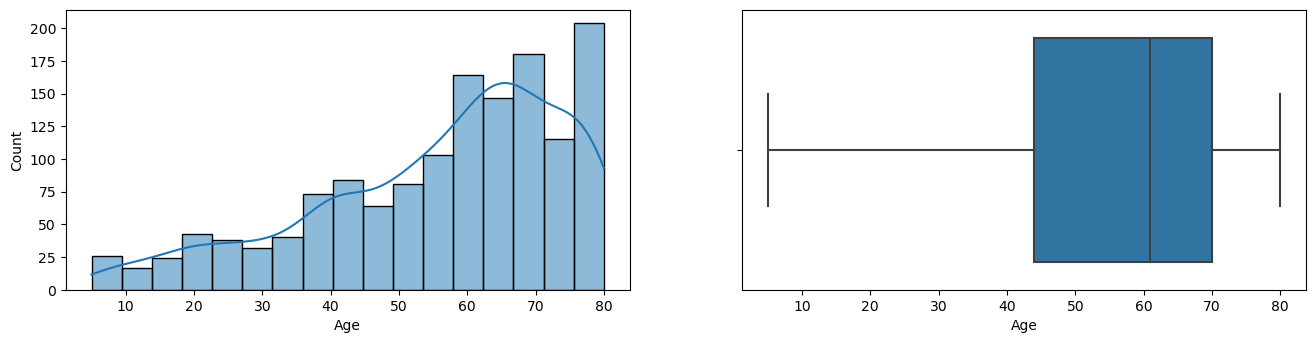

In [30]:
# Checking for outliers in the Age column
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.histplot(data3['Age'],kde=True)

plt.subplot(2,2,2)
sns.boxplot(x=data3['Age'])

plt.show()
# No outliers are present in the age column

In [31]:
data3.head()

,Price,Age,KM,Fuel,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500.0,23.0,46986,Diesel,90,0,2000,3,4,5,1165
1,13750.0,23.0,72937,Diesel,90,0,2000,3,4,5,1165
2,13950.0,24.0,41711,Diesel,90,0,2000,3,4,5,1165
3,14950.0,26.0,48000,Diesel,90,0,2000,3,4,5,1165
4,13750.0,30.0,38500,Diesel,90,0,2000,3,4,5,1170


<Axes: xlabel='Age'>

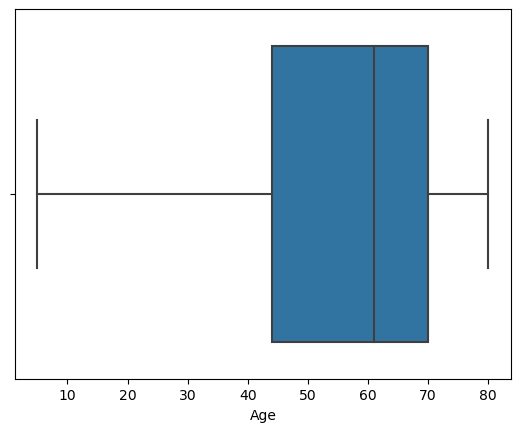

In [32]:
#checking for outliers in the KM column
sns.boxplot(x=data3['Age'])

<Axes: xlabel='Age', ylabel='Count'>

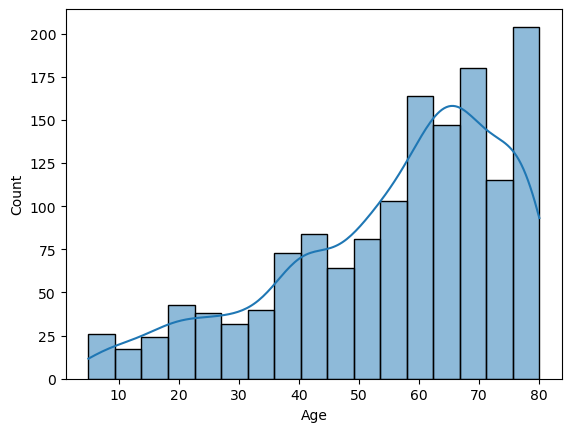

In [33]:
sns.histplot(data3['Age'],kde=True)
# KM column has no outliers

In [34]:
data3.head()

,Price,Age,KM,Fuel,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500.0,23.0,46986,Diesel,90,0,2000,3,4,5,1165
1,13750.0,23.0,72937,Diesel,90,0,2000,3,4,5,1165
2,13950.0,24.0,41711,Diesel,90,0,2000,3,4,5,1165
3,14950.0,26.0,48000,Diesel,90,0,2000,3,4,5,1165
4,13750.0,30.0,38500,Diesel,90,0,2000,3,4,5,1170


In [35]:
# Fuel is a categorical data , so checking number of unique values
data3['Fuel'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [36]:
# As our machine learning models hates categorical data , we will convert it to make meaningful for our model.
# One-hot encoding using get_dummies
data4 = pd.get_dummies(data3, columns=['Fuel'])

# Print the original and encoded DataFrames
print("Original DataFrame:")
print(data3)
print("\nOne-Hot Encoded DataFrame:")
print(data4)

Original DataFrame:
        Price   Age     KM    Fuel   HP  Automatic    cc  Doors  Cylinders  \
0     13500.0  23.0  46986  Diesel   90          0  2000      3          4   
1     13750.0  23.0  72937  Diesel   90          0  2000      3          4   
2     13950.0  24.0  41711  Diesel   90          0  2000      3          4   
3     14950.0  26.0  48000  Diesel   90          0  2000      3          4   
4     13750.0  30.0  38500  Diesel   90          0  2000      3          4   
...       ...   ...    ...     ...  ...        ...   ...    ...        ...   
1431   7500.0  69.0  20544  Petrol   86          0  1300      3          4   
1432  10845.0  72.0  19000  Petrol   86          0  1300      3          4   
1433   8500.0  71.0  17016  Petrol   86          0  1300      3          4   
1434   7250.0  70.0  16916  Petrol   86          0  1300      3          4   
1435   6950.0  76.0      1  Petrol  110          0  1600      5          4   

      Gears  Weight  
0         5    1165  

In [37]:
data4

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_CNG,Fuel_Diesel,Fuel_Petrol
0,13500.0,23.0,46986,90,0,2000,3,4,5,1165,False,True,False
1,13750.0,23.0,72937,90,0,2000,3,4,5,1165,False,True,False
2,13950.0,24.0,41711,90,0,2000,3,4,5,1165,False,True,False
3,14950.0,26.0,48000,90,0,2000,3,4,5,1165,False,True,False
4,13750.0,30.0,38500,90,0,2000,3,4,5,1170,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500.0,69.0,20544,86,0,1300,3,4,5,1025,False,False,True
1432,10845.0,72.0,19000,86,0,1300,3,4,5,1015,False,False,True
1433,8500.0,71.0,17016,86,0,1300,3,4,5,1015,False,False,True
1434,7250.0,70.0,16916,86,0,1300,3,4,5,1015,False,False,True


In [38]:
data4.head()

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_CNG,Fuel_Diesel,Fuel_Petrol
0,13500.0,23.0,46986,90,0,2000,3,4,5,1165,False,True,False
1,13750.0,23.0,72937,90,0,2000,3,4,5,1165,False,True,False
2,13950.0,24.0,41711,90,0,2000,3,4,5,1165,False,True,False
3,14950.0,26.0,48000,90,0,2000,3,4,5,1165,False,True,False
4,13750.0,30.0,38500,90,0,2000,3,4,5,1170,False,True,False


In [39]:
data4['HP'].unique()

array([ 90, 192,  69, 110,  97,  71, 116,  98,  86,  72, 107,  73],
      dtype=int64)

<Axes: xlabel='HP'>

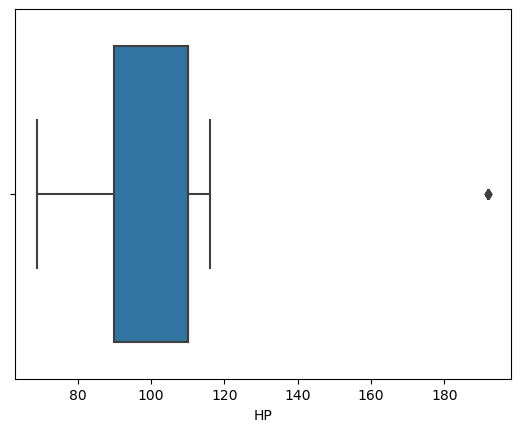

In [40]:
#checking for outliers in HP column
sns.boxplot(x=data4['HP'])

<Axes: xlabel='HP', ylabel='Count'>

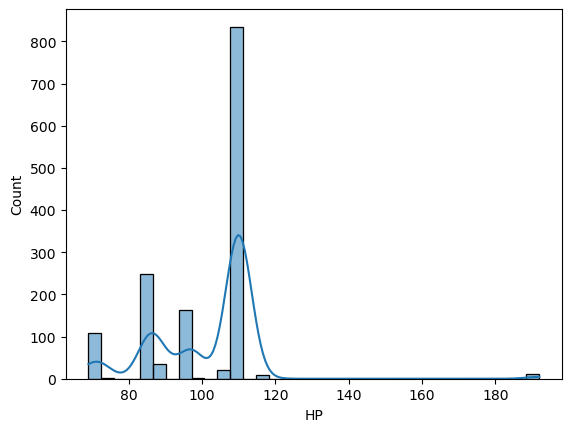

In [41]:
sns.histplot(data4['HP'],kde=True)

In [42]:
data4['HP'].skew()
# As data is skewed , IQR method  for outlier detection is prefered.

0.9578333639343268

In [43]:
# Finding the IQR
percentile25_hp = data4['HP'].quantile(0.25)
percentile75_hp = data4['HP'].quantile(0.75)
iqr_hp = percentile75_hp - percentile25_hp

In [44]:
#Finding upper and lower limit
upper_limit_hp = percentile75_hp + 1.5*iqr_hp
lower_limit_hp = percentile25_hp - 1.5*iqr_hp
print("Upper Limit",upper_limit_hp)
print("Lower Limit",lower_limit_hp)

Upper Limit 140.0
Lower Limit 60.0


In [45]:
#Finding Outliers
data4[data4['HP']>upper_limit_hp]
# For upper limit we have 11 outliers

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_CNG,Fuel_Diesel,Fuel_Petrol
8,17200.0,27.0,19700,192,0,1800,3,4,5,1185,False,False,True
10,17200.0,25.0,31461,192,0,1800,3,4,6,1185,False,False,True
11,17200.0,22.0,43610,192,0,1800,3,4,6,1185,False,False,True
12,17200.0,25.0,32189,192,0,1800,3,4,6,1185,False,False,True
13,17200.0,31.0,23000,192,0,1800,3,4,6,1185,False,False,True
14,17200.0,32.0,34131,192,0,1800,3,4,6,1185,False,False,True
15,17200.0,28.0,18739,192,0,1800,3,4,6,1185,False,False,True
16,17200.0,30.0,34000,192,0,1800,3,4,5,1185,False,False,True
49,17200.0,31.0,64982,192,0,1800,5,4,6,1195,False,False,True
53,17200.0,27.0,49866,192,0,1800,5,4,5,1195,False,False,True


In [46]:
#outlier for lower limits
data4[data4['HP']<lower_limit_hp]
# no outliers are present as per lower limit

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_CNG,Fuel_Diesel,Fuel_Petrol


In [47]:
#capping the outliers
data4['HP'] = np.where(
    data4['HP']>upper_limit_hp,
    upper_limit_hp,
    np.where(
        data4['HP']<lower_limit_hp,
        lower_limit_hp,
        data4['HP']
    )
)
        

<Axes: xlabel='HP'>

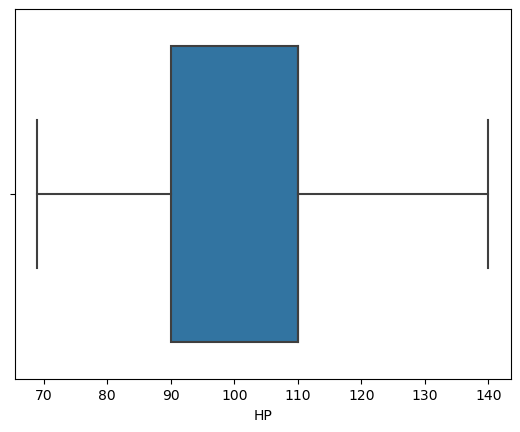

In [48]:
# checking again for outliers
sns.boxplot(x = data4['HP'])

<Axes: xlabel='HP', ylabel='Count'>

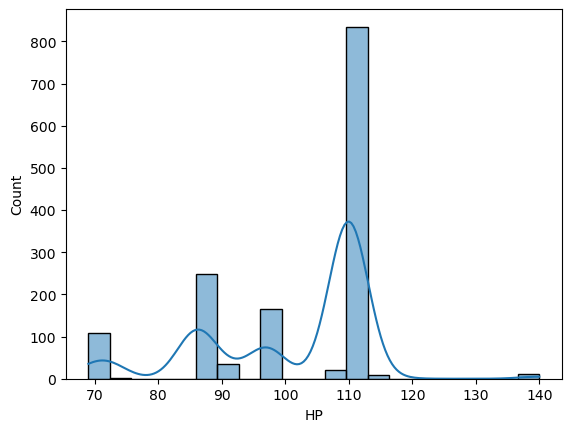

In [49]:
sns.histplot(data4['HP'],kde = True)
# No outliers are present in the HP column

In [50]:
data4.head()

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_CNG,Fuel_Diesel,Fuel_Petrol
0,13500.0,23.0,46986,90.0,0,2000,3,4,5,1165,False,True,False
1,13750.0,23.0,72937,90.0,0,2000,3,4,5,1165,False,True,False
2,13950.0,24.0,41711,90.0,0,2000,3,4,5,1165,False,True,False
3,14950.0,26.0,48000,90.0,0,2000,3,4,5,1165,False,True,False
4,13750.0,30.0,38500,90.0,0,2000,3,4,5,1170,False,True,False


<Axes: xlabel='Automatic'>

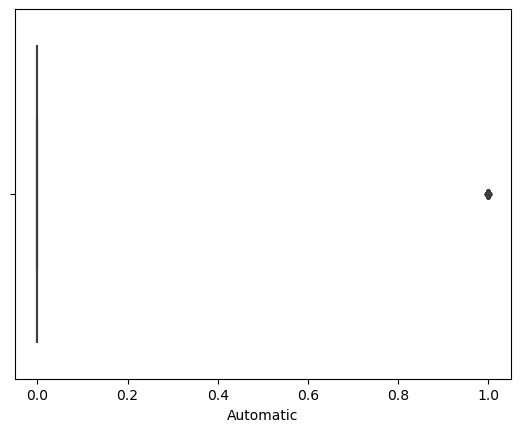

In [51]:
#checking for outliers in the Automatic column
sns.boxplot(x=data4['Automatic'])
#it seems that Automatic column has outliers but there are no outliers asit has only two values which is 0 and 1 which is favourable for machine learning models.

In [52]:
#checking for outliers in the cc column
#checking for unique values in the cc column
data4['cc'].unique()

array([ 2000,  1800,  1900,  1600,  1400,  1598, 16000,  1995,  1398,
        1300,  1587,  1975,  1332], dtype=int64)

<Axes: xlabel='cc'>

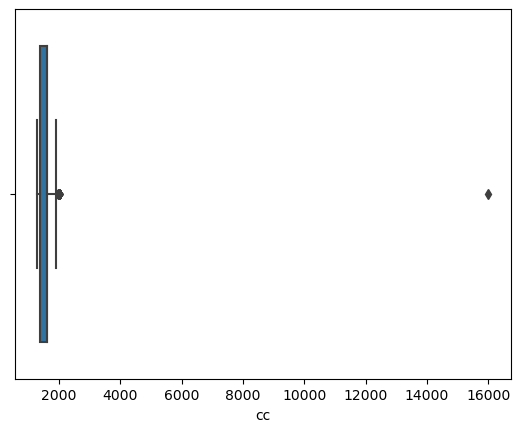

In [53]:
sns.boxplot(x=data4['cc'])

<Axes: xlabel='cc', ylabel='Count'>

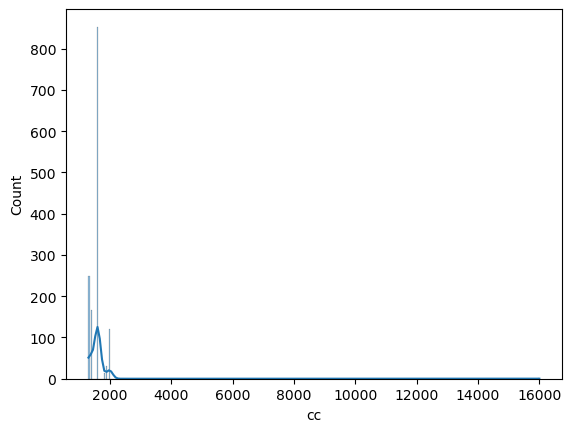

In [54]:
sns.histplot(data4['cc'],kde=True)

In [55]:
data4['cc'].skew()
#data in cc column is highly skewed ,IQR method is highly recommended

27.45219619846663

In [56]:
# Finding the IQR
percentile25_cc = data4['cc'].quantile(0.25)
percentile75_cc = data4['cc'].quantile(0.75)
iqr_cc = percentile75_cc - percentile25_cc

In [57]:
#Finding upper and lower limit
upper_limit_cc = percentile75_cc + 1.5*iqr_cc
lower_limit_cc = percentile25_cc - 1.5*iqr_cc
print("Upper Limit",upper_limit_cc)
print("Lower Limit",lower_limit_cc)

Upper Limit 1900.0
Lower Limit 1100.0


In [58]:
#Finding Outliers
data4[data4['cc']>upper_limit_cc]
# For upper limit we have 122 outliers

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_CNG,Fuel_Diesel,Fuel_Petrol
0,13500.0,23.0,46986,90.0,0,2000,3,4,5,1165,False,True,False
1,13750.0,23.0,72937,90.0,0,2000,3,4,5,1165,False,True,False
2,13950.0,24.0,41711,90.0,0,2000,3,4,5,1165,False,True,False
3,14950.0,26.0,48000,90.0,0,2000,3,4,5,1165,False,True,False
4,13750.0,30.0,38500,90.0,0,2000,3,4,5,1170,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,8750.0,74.0,89800,72.0,0,2000,3,4,5,1115,False,True,False
1202,6950.0,73.0,88186,72.0,0,2000,3,4,5,1115,False,True,False
1216,8500.0,70.0,85864,72.0,0,2000,5,4,5,1135,False,True,False
1320,9400.0,69.0,67092,72.0,0,2000,3,4,5,1115,False,True,False


In [59]:
#outlier for lower limits
data4[data4['cc']<lower_limit_cc]
# no outliers are present as per lower limit

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_CNG,Fuel_Diesel,Fuel_Petrol


In [60]:
#capping the outliers
data4['cc'] = np.where(
    data4['cc']>upper_limit_cc,
    upper_limit_cc,
    np.where(
        data4['cc']<lower_limit_cc,
        lower_limit_cc,
        data4['cc']
    )
)
     

<Axes: xlabel='cc'>

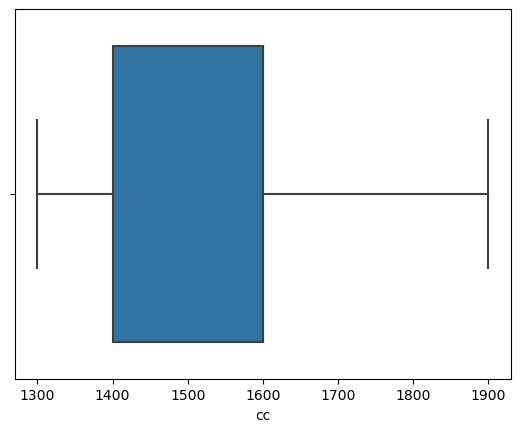

In [61]:
# checking for outliers in the cc column again
sns.boxplot(x=data4['cc'])

<Axes: xlabel='cc', ylabel='Count'>

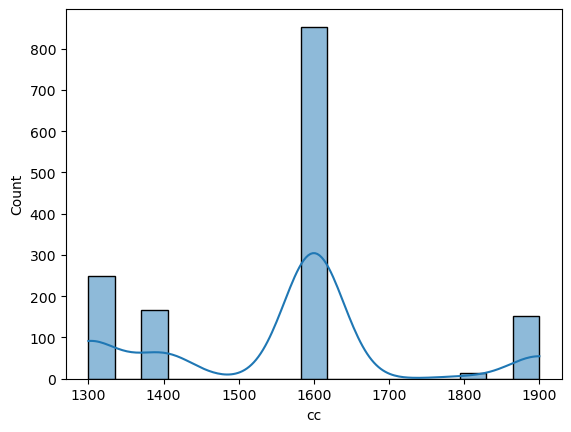

In [62]:
sns.histplot(data4['cc'],kde=True)
#we have successfully removed the outliers from the cc column

In [63]:
data4.head()

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_CNG,Fuel_Diesel,Fuel_Petrol
0,13500.0,23.0,46986,90.0,0,1900.0,3,4,5,1165,False,True,False
1,13750.0,23.0,72937,90.0,0,1900.0,3,4,5,1165,False,True,False
2,13950.0,24.0,41711,90.0,0,1900.0,3,4,5,1165,False,True,False
3,14950.0,26.0,48000,90.0,0,1900.0,3,4,5,1165,False,True,False
4,13750.0,30.0,38500,90.0,0,1900.0,3,4,5,1170,False,True,False


<Axes: xlabel='Doors'>

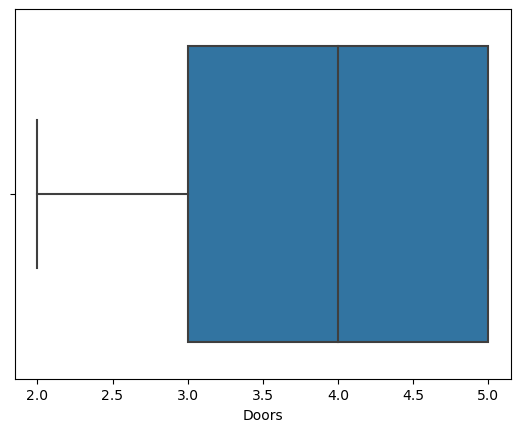

In [64]:
#checking for outliers in the Doors column
sns.boxplot(x=data4['Doors'])

<Axes: xlabel='Doors', ylabel='Count'>

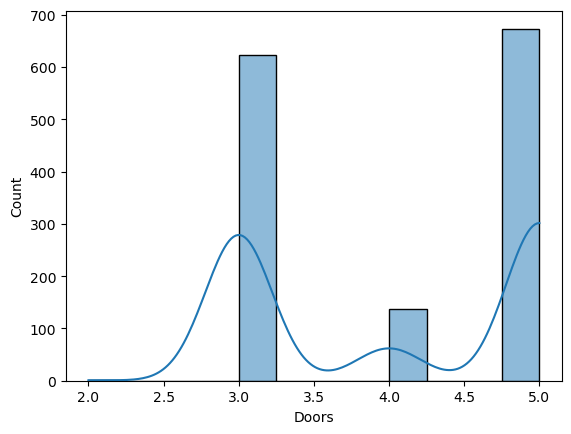

In [65]:
sns.histplot(data4['Doors'],kde=True)
# no outliers are present in the Doors column

In [66]:
data4.head()

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_CNG,Fuel_Diesel,Fuel_Petrol
0,13500.0,23.0,46986,90.0,0,1900.0,3,4,5,1165,False,True,False
1,13750.0,23.0,72937,90.0,0,1900.0,3,4,5,1165,False,True,False
2,13950.0,24.0,41711,90.0,0,1900.0,3,4,5,1165,False,True,False
3,14950.0,26.0,48000,90.0,0,1900.0,3,4,5,1165,False,True,False
4,13750.0,30.0,38500,90.0,0,1900.0,3,4,5,1170,False,True,False


<Axes: xlabel='Cylinders'>

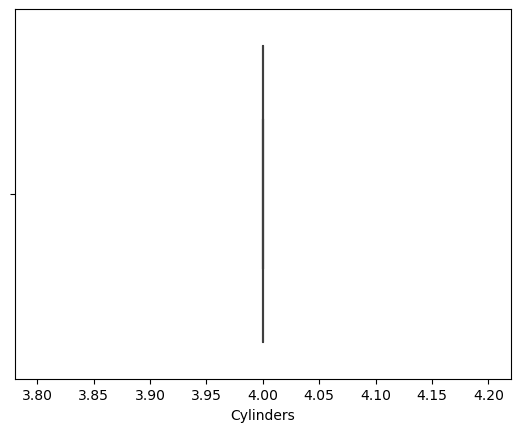

In [67]:
#checking for outliers in the Cylinders column
sns.boxplot(x=data4['Cylinders'])

<Axes: xlabel='Cylinders', ylabel='Count'>

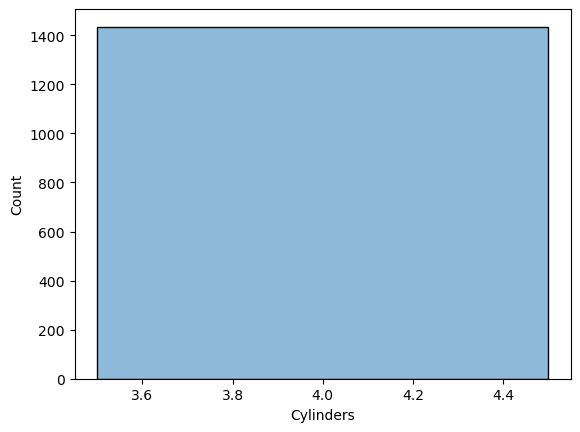

In [68]:
sns.histplot(data4['Cylinders'],kde=True)
# There is only one value in the Cylinders column , so no outliers are present.

In [69]:
data4.head()

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_CNG,Fuel_Diesel,Fuel_Petrol
0,13500.0,23.0,46986,90.0,0,1900.0,3,4,5,1165,False,True,False
1,13750.0,23.0,72937,90.0,0,1900.0,3,4,5,1165,False,True,False
2,13950.0,24.0,41711,90.0,0,1900.0,3,4,5,1165,False,True,False
3,14950.0,26.0,48000,90.0,0,1900.0,3,4,5,1165,False,True,False
4,13750.0,30.0,38500,90.0,0,1900.0,3,4,5,1170,False,True,False


<Axes: xlabel='Gears'>

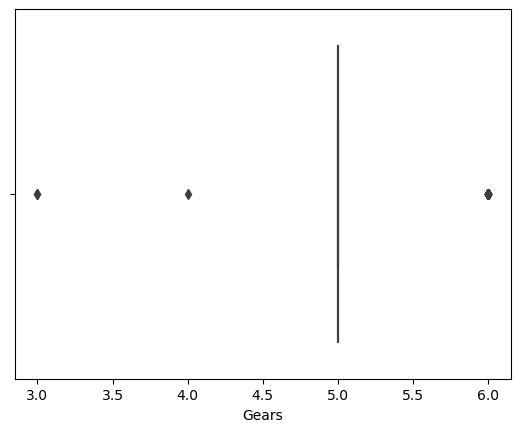

In [70]:
#checking for outliers in the Gears column
sns.boxplot(x=data4['Gears'])

<Axes: xlabel='Gears', ylabel='Count'>

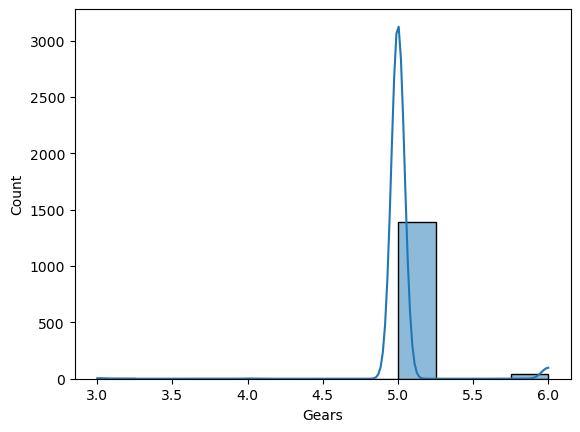

In [71]:
sns.histplot(data4['Gears'],kde=True)

In [72]:
data4['Gears'].unique()
# gear of a car is something that completely depends on the technology used. so, there is no need to treat thus column for outliers. Although expert suggestion is recommended.

array([5, 6, 3, 4], dtype=int64)

In [73]:
data4.head()

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_CNG,Fuel_Diesel,Fuel_Petrol
0,13500.0,23.0,46986,90.0,0,1900.0,3,4,5,1165,False,True,False
1,13750.0,23.0,72937,90.0,0,1900.0,3,4,5,1165,False,True,False
2,13950.0,24.0,41711,90.0,0,1900.0,3,4,5,1165,False,True,False
3,14950.0,26.0,48000,90.0,0,1900.0,3,4,5,1165,False,True,False
4,13750.0,30.0,38500,90.0,0,1900.0,3,4,5,1170,False,True,False


<Axes: xlabel='Weight'>

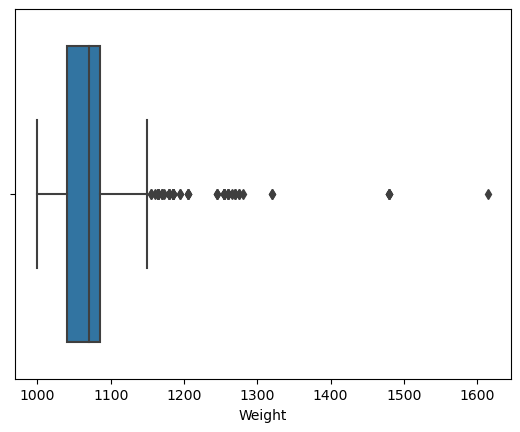

In [74]:
# checking for outliers in the weight column
sns.boxplot(x=data4['Weight'])

<Axes: xlabel='Weight', ylabel='Count'>

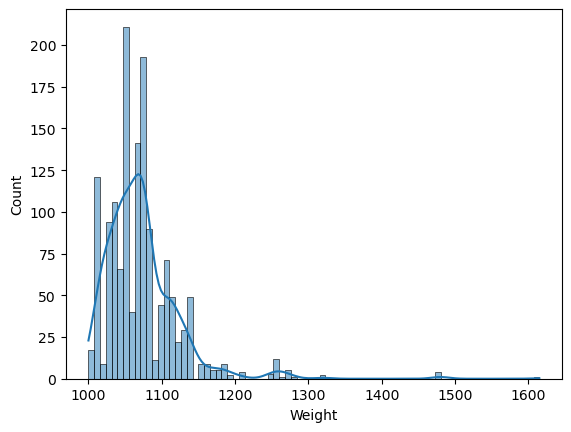

In [75]:
sns.histplot(data4['Weight'],kde=True)

In [76]:
data4['Weight'].skew()
#data in cc column is highly skewed ,IQR method is highly recommended

3.1165183382777437

In [77]:
# Finding the IQR
percentile25_weight = data4['Weight'].quantile(0.25)
percentile75_weight = data4['Weight'].quantile(0.75)
iqr_weight = percentile75_weight - percentile25_weight

In [78]:
#Finding upper and lower limit
upper_limit_weight = percentile75_weight + 1.5*iqr_weight
lower_limit_weight = percentile25_weight - 1.5*iqr_weight
print("Upper Limit",upper_limit_weight)
print("Lower Limit",lower_limit_weight)

Upper Limit 1152.5
Lower Limit 972.5


In [79]:
#Finding Outliers
data4[data4['Weight']>upper_limit_weight]
# For upper limit we have 65 outliers

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_CNG,Fuel_Diesel,Fuel_Petrol
0,13500.0,23.0,46986,90.0,0,1900.0,3,4,5,1165,False,True,False
1,13750.0,23.0,72937,90.0,0,1900.0,3,4,5,1165,False,True,False
2,13950.0,24.0,41711,90.0,0,1900.0,3,4,5,1165,False,True,False
3,14950.0,26.0,48000,90.0,0,1900.0,3,4,5,1165,False,True,False
4,13750.0,30.0,38500,90.0,0,1900.0,3,4,5,1170,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,7500.0,50.0,1,90.0,0,1900.0,3,4,5,1260,False,True,False
654,6950.0,65.0,114383,90.0,0,1900.0,3,4,5,1260,False,True,False
768,10950.0,59.0,78750,90.0,0,1900.0,5,4,5,1155,False,True,False
960,9390.0,66.0,50806,86.0,0,1300.0,3,4,5,1480,False,False,True


In [80]:
#outlier for lower limits
data4[data4['Weight']<lower_limit_weight]
# no outliers are present as per lower limit

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_CNG,Fuel_Diesel,Fuel_Petrol


In [81]:
#capping the outliers
data4['Weight'] = np.where(
    data4['Weight']>upper_limit_weight,
    upper_limit_weight,
    np.where(
        data4['Weight']<lower_limit_weight,
        lower_limit_weight,
        data4['Weight']
    )
)
     

<Axes: xlabel='Weight'>

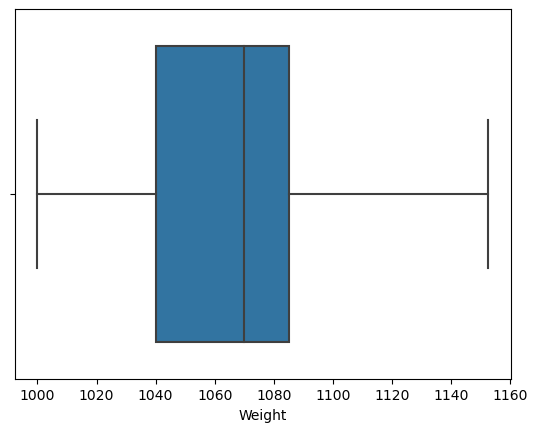

In [82]:
#checking again for outliers
sns.boxplot(x=data4['Weight'])

<Axes: xlabel='Weight', ylabel='Count'>

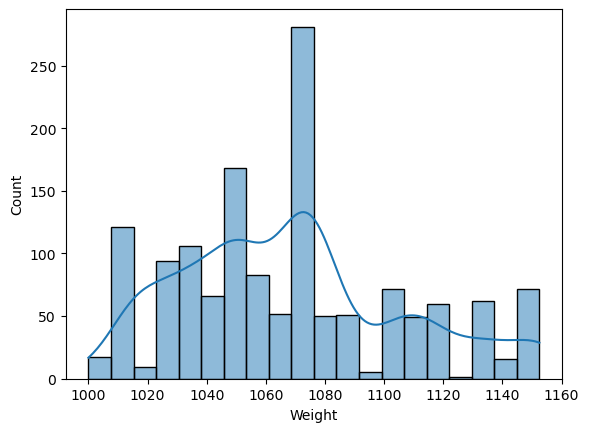

In [83]:
sns.histplot(data4['Weight'],kde=True)
#outliers has been successfully capped.

In [84]:
data4.head()

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_CNG,Fuel_Diesel,Fuel_Petrol
0,13500.0,23.0,46986,90.0,0,1900.0,3,4,5,1152.5,False,True,False
1,13750.0,23.0,72937,90.0,0,1900.0,3,4,5,1152.5,False,True,False
2,13950.0,24.0,41711,90.0,0,1900.0,3,4,5,1152.5,False,True,False
3,14950.0,26.0,48000,90.0,0,1900.0,3,4,5,1152.5,False,True,False
4,13750.0,30.0,38500,90.0,0,1900.0,3,4,5,1152.5,False,True,False


In [85]:
from sklearn.model_selection import train_test_split
# For model building we need to assume one of the column as y and rest as x
X = data4.drop('Gears', axis=1)  
y = data4['Gears']

# Split data into train and test sets (80%/20% split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1148, 12)
X_test shape: (287, 12)
y_train shape: (1148,)
y_test shape: (287,)


In [86]:
#Preparing a premiliminary model with all the columns
import statsmodels.formula.api as smf
model = smf.ols('Gears~Price+Age+KM+HP+Automatic+cc+Doors+Cylinders+Weight+Fuel_CNG+Fuel_Diesel+Fuel_Petrol',data = data4).fit()
model.summary()
# Upon looking the values such as R-squared and Adj. R-squared the model seems good but we will try to improve it .

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Gears   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     15.33
Date:                Sun, 07 Jul 2024   Prob (F-statistic):           2.47e-26
Time:                        17:41:11   Log-Likelihood:                 431.64
No. Observations:                1435   AIC:                            -841.3
Df Residuals:                    1424   BIC:                            -783.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.2182      0.015     14.968      0.000       0.190       0.247
Fuel_CNG[T.True]       -0.0255      0.037     -0.681      0.496      -0.099       0.048
Fuel_Diesel[T.True]     0.1172      0.048      2.417      0.016       0.022       0.212
Fuel_Petrol[T.True]     0.1265      0.026      4.793      0.000       0.075       0.178
Price                1.397e-05   4.38e-06      3.188      0.001    5.38e-06    2.26e-05
Age                     0.0019      0.001      3.129      0.002       0.001       0.003
KM                   7.187e-07   1.92e-07      3.753      0.000    3.43e-07    1.09e-06
HP                      0.0028      0.001      2.400      0.017       0.001       0.005
Automatic              -0.1118      0.022     -5.080      0.000      -0.155      -0.069
cc                     -0.0001      0.000     -1.146      0.252      -0.000    8.28e-05
Doors                  -0.0496      0.006     -8.591      0.000      -0.061      -0.038
Cylinders               0.8729      0.058     14.968      0.000       0.758       0.987
Weight                  0.0009      0.000      3.320      0.001       0.000       0.001
==============================================================================
Omnibus:                      825.181   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61141.103
Skew:                           1.839   Prob(JB):                         0.00
Kurtosis:                      34.765   Cond. No.                     6.20e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.31e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [87]:
data4.head()

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_CNG,Fuel_Diesel,Fuel_Petrol
0,13500.0,23.0,46986,90.0,0,1900.0,3,4,5,1152.5,False,True,False
1,13750.0,23.0,72937,90.0,0,1900.0,3,4,5,1152.5,False,True,False
2,13950.0,24.0,41711,90.0,0,1900.0,3,4,5,1152.5,False,True,False
3,14950.0,26.0,48000,90.0,0,1900.0,3,4,5,1152.5,False,True,False
4,13750.0,30.0,38500,90.0,0,1900.0,3,4,5,1152.5,False,True,False


In [88]:
# we will use hypothesis testing method to improve our model.
#Hypothesis testing for model
# H0 : All the parameters are not significant.
# H1 : At least one parameter is significant.
# Prob-(F-statics) is less than 0.05 than we will reject H0.


In [89]:
# coefficients
model.params
# strong corelation among x-columns is called multi-collinearity.
# Although value more than 10 confirms strong collinearity. But here, weight and cylinder column shows strong collinearity.

Intercept              2.182238e-01
Fuel_CNG[T.True]      -2.548678e-02
Fuel_Diesel[T.True]    1.171661e-01
Fuel_Petrol[T.True]    1.265445e-01
Price                  1.397319e-05
Age                    1.890895e-03
KM                     7.186765e-07
HP                     2.796002e-03
Automatic             -1.118095e-01
cc                    -1.163106e-04
Doors                 -4.964697e-02
Cylinders              8.728951e-01
Weight                 9.322802e-04
dtype: float64

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\singh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


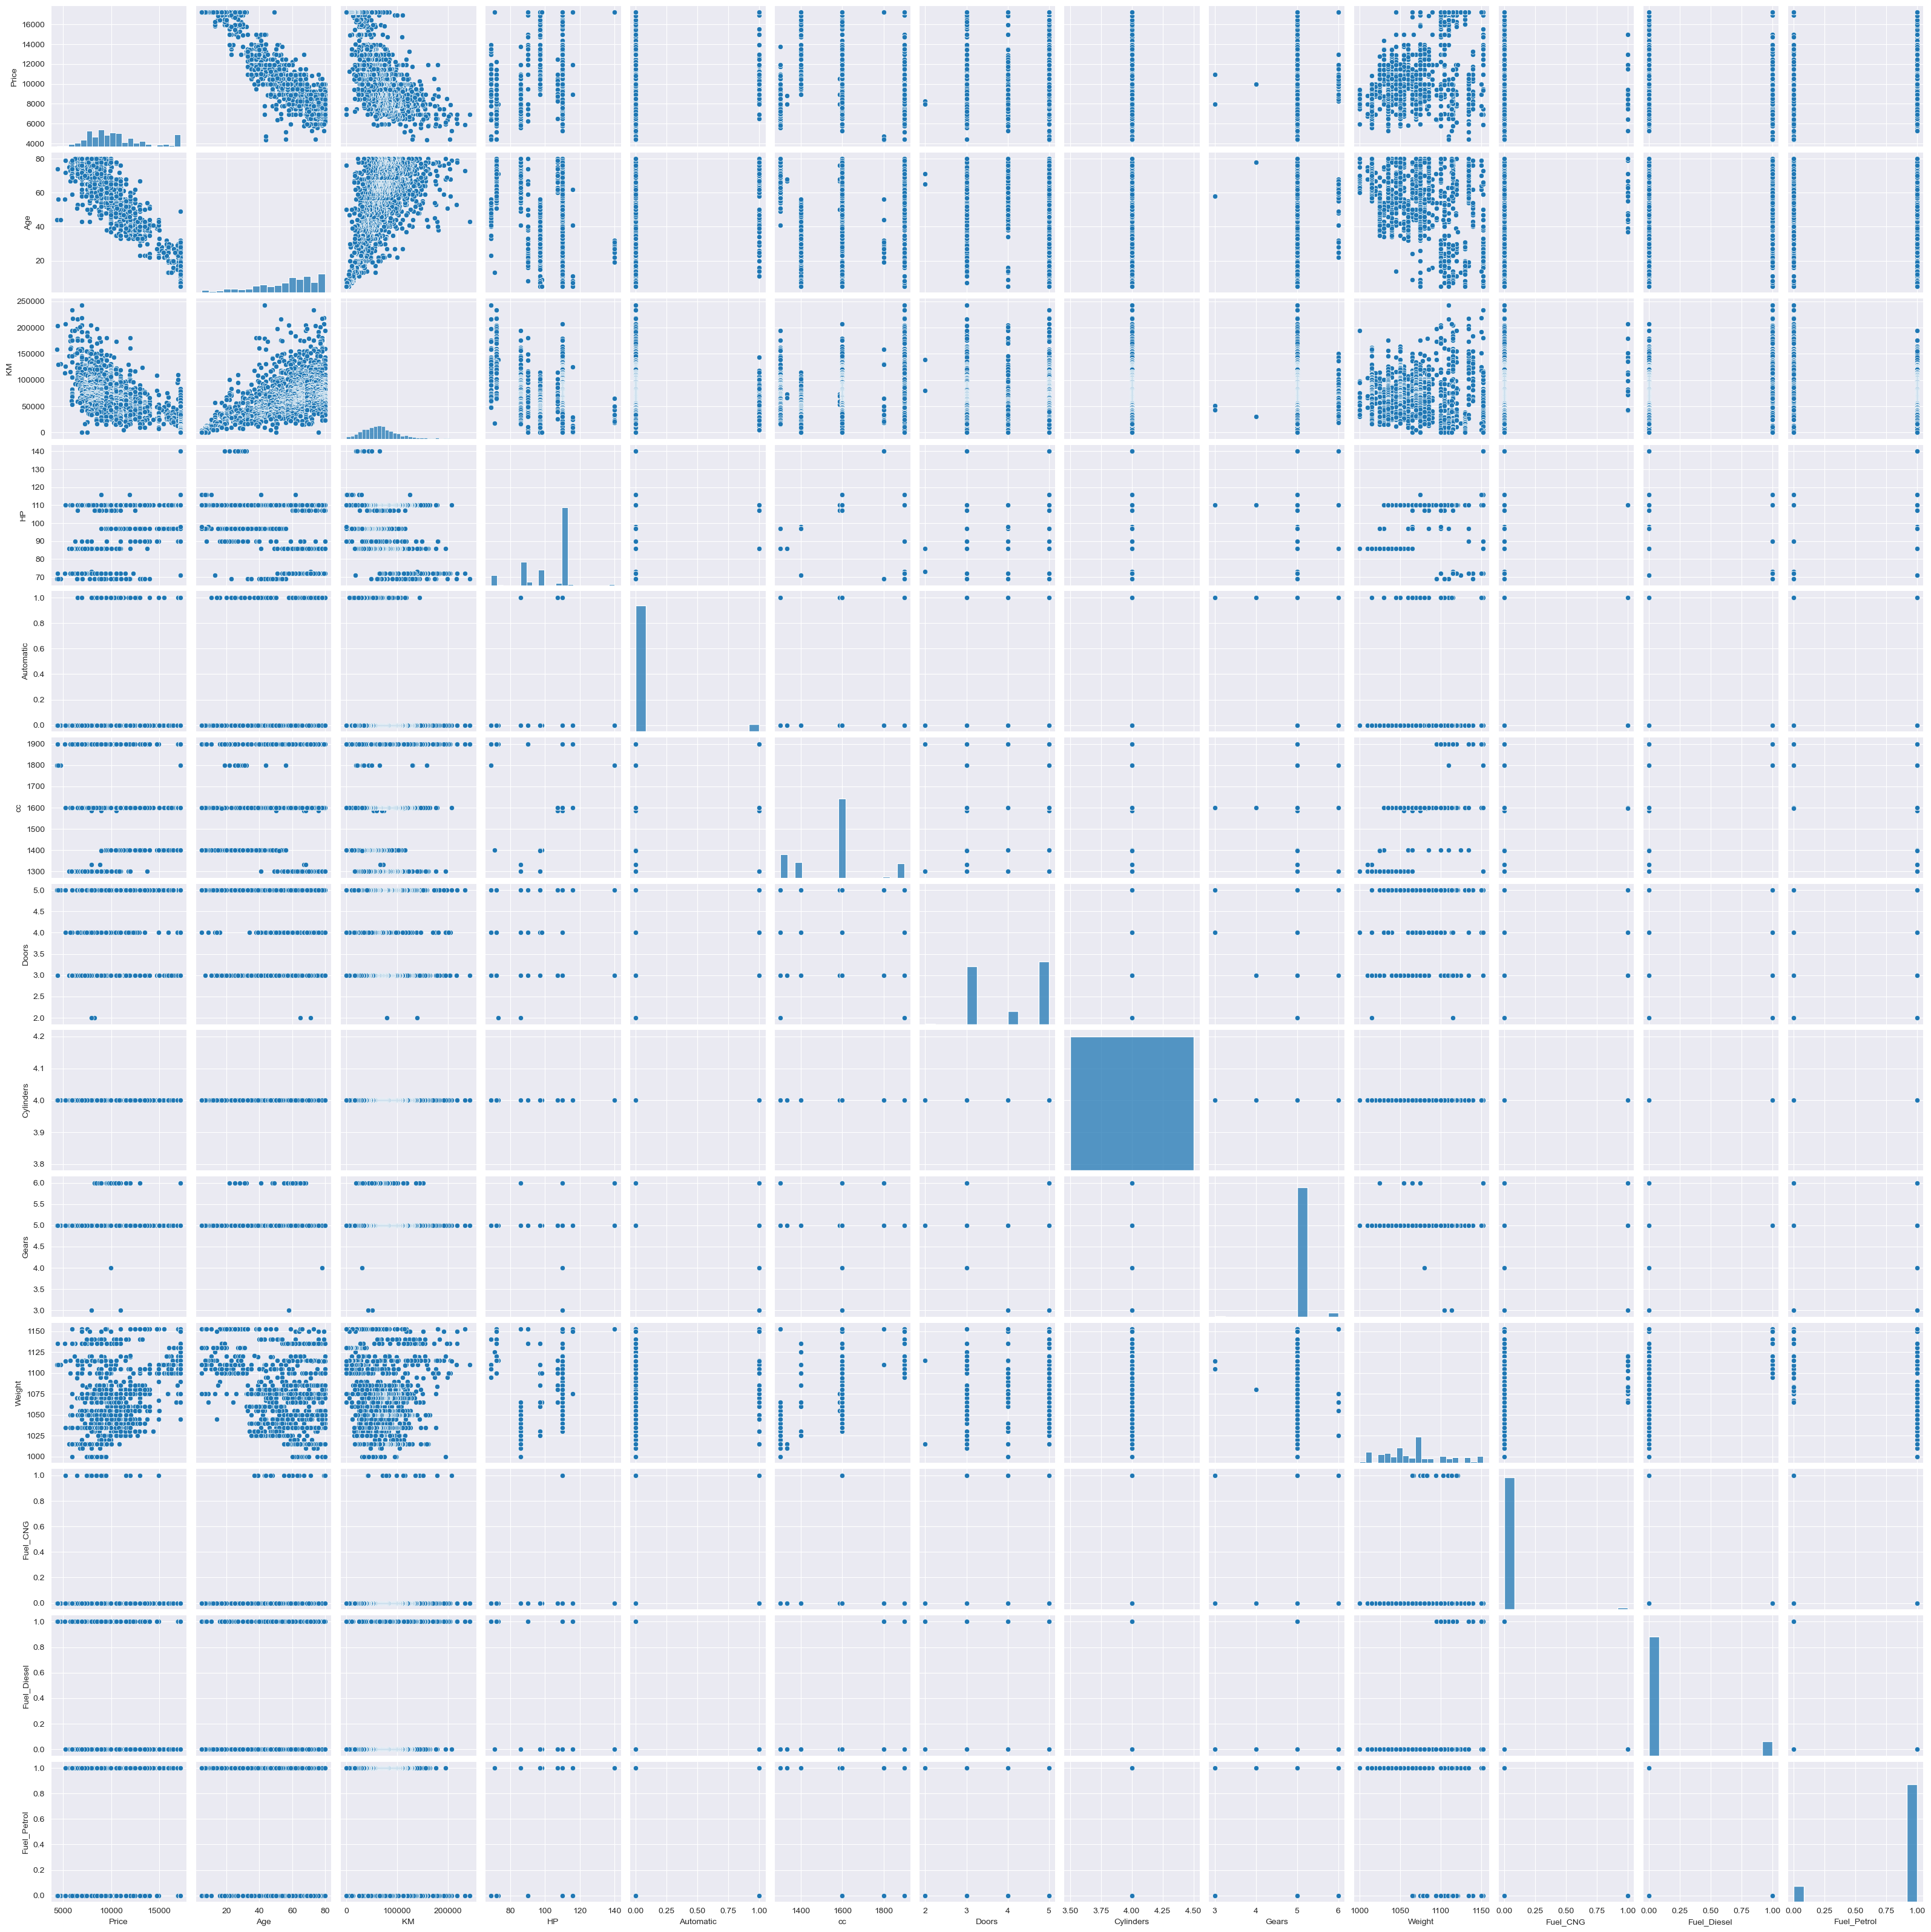

In [90]:
data4.corr(numeric_only=True)
sns.set_style(style='darkgrid')
sns.pairplot(data4)

In [91]:
# R-sqr value predicts how good X columns are helping in the predicting y columns.
# Calculating VIF (Variance Influence Factor)
rsq_price = smf.ols('Price~Age+KM+HP+Automatic+cc+Doors+Cylinders+Weight+Fuel_CNG+Fuel_Diesel+Fuel_Petrol',data=data4).fit().rsquared
vif_price=1/(1-rsq_price)
rsq_age = smf.ols('Age~Price+KM+HP+Automatic+cc+Doors+Cylinders+Weight+Fuel_CNG+Fuel_Diesel+Fuel_Petrol',data=data4).fit().rsquared
vif_age=1/(1-rsq_age)
rsq_km = smf.ols('KM~Age+Price+HP+Automatic+cc+Doors+Cylinders+Weight+Fuel_CNG+Fuel_Diesel+Fuel_Petrol',data=data4).fit().rsquared
vif_km=1/(1-rsq_km)
rsq_hp = smf.ols('HP~Age+Price+KM+Automatic+cc+Doors+Cylinders+Weight+Fuel_CNG+Fuel_Diesel+Fuel_Petrol',data=data4).fit().rsquared
vif_hp=1/(1-rsq_hp)
rsq_automatic = smf.ols('Automatic~Age+Price+KM+HP+cc+Doors+Cylinders+Weight+Fuel_CNG+Fuel_Diesel+Fuel_Petrol',data=data4).fit().rsquared
vif_automatic=1/(1-rsq_automatic)
rsq_cc = smf.ols('cc~Age+Price+KM+HP+Automatic+Doors+Cylinders+Weight+Fuel_CNG+Fuel_Diesel+Fuel_Petrol',data=data4).fit().rsquared
vif_cc=1/(1-rsq_cc)
rsq_doors = smf.ols('Doors~Age+Price+KM+HP+Automatic+cc+Cylinders+Weight+Fuel_CNG+Fuel_Diesel+Fuel_Petrol',data=data4).fit().rsquared
vif_doors=1/(1-rsq_doors)
rsq_cylinders = smf.ols('Cylinders~Age+Price+KM+HP+Automatic+cc+Doors+Weight+Fuel_CNG+Fuel_Diesel+Fuel_Petrol',data=data4).fit().rsquared
vif_cylinders=1/(1-rsq_cylinders)
rsq_weight = smf.ols('Weight~Age+Price+KM+HP+Automatic+cc+Doors+Cylinders+Fuel_CNG+Fuel_Diesel+Fuel_Petrol',data=data4).fit().rsquared
vif_weight=1/(1-rsq_weight)


C:\Users\singh\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [92]:
# Storing VIF values in a data frame
d1 = {'variables':['Price','Age','KM','HP','Automatic','cc','Doors','Cylinders','Weight'],"VIF":[vif_price,vif_age,vif_km,vif_hp,vif_automatic,vif_cc,vif_doors,vif_cylinders,vif_weight]}
vif_frame = pd.DataFrame(d1)
vif_frame
# For VIF less than 10 is recommended value . As HP and cc are showing corelation we will have to remove anyone .

,variables,VIF
0,Price,7.553178
1,Age,5.560390
2,KM,2.286504
3,HP,10.406750
4,Automatic,1.131894
5,cc,13.014958
6,Doors,1.344489
7,Cylinders,0.000000
8,Weight,4.977282


In [93]:
# Building model with HP removing cc
import statsmodels.formula.api as smf
model = smf.ols('Gears~Price+Age+KM+HP+Automatic+Doors+Cylinders+Weight+Fuel_CNG+Fuel_Diesel+Fuel_Petrol',data = data4).fit()
print(f'AIC:{model.aic},rsq_hp:{rsq_hp}')

AIC:-841.9591393977821,rsq_hp:0.9039085198204891


In [94]:
# Building model with cc and removing hp
import statsmodels.formula.api as smf
model = smf.ols('Gears~Price+Age+KM+Automatic+cc+Doors+Cylinders+Weight+Fuel_CNG+Fuel_Diesel+Fuel_Petrol',data = data4).fit()
print(f'AIC:{model.aic},rsq_cc:{rsq_cc}')

AIC:-837.490943944867,rsq_cc:0.9231653280209319


In [95]:
# Building model without cc anf hp
import statsmodels.formula.api as smf
model = smf.ols('Gears~Price+Age+KM+Automatic+Doors+Cylinders+Weight+Fuel_CNG+Fuel_Diesel+Fuel_Petrol',data = data4).fit()
print(f'AIC:{model.aic},rsq_Price:{rsq_price}')

AIC:-835.6881625587043,rsq_Price:0.8676053919207725


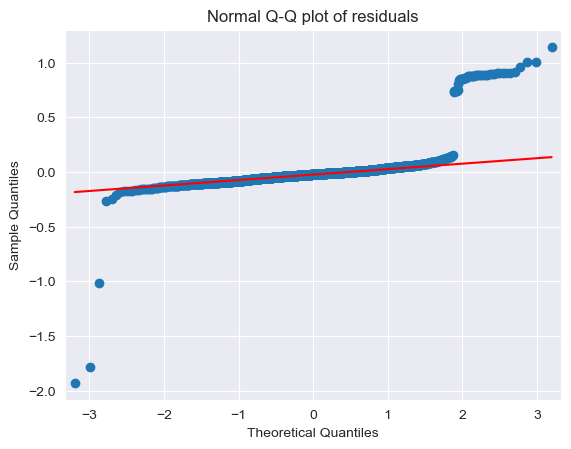

In [96]:
# creating Normality of Residual Q-Q plot
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.ols('Gears~Price+Age+KM+HP+Automatic+cc+Doors+Cylinders+Weight+Fuel_CNG+Fuel_Diesel+Fuel_Petrol',data = data4).fit()
qqplot = sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [97]:
# printing value of y-y^
model.resid

0      -0.049029
1      -0.071172
2      -0.053417
3      -0.075691
4      -0.059660
          ...   
1431    0.017717
1432   -0.024263
1433    0.011821
1434    0.031250
1435    0.011040
Length: 1435, dtype: float64

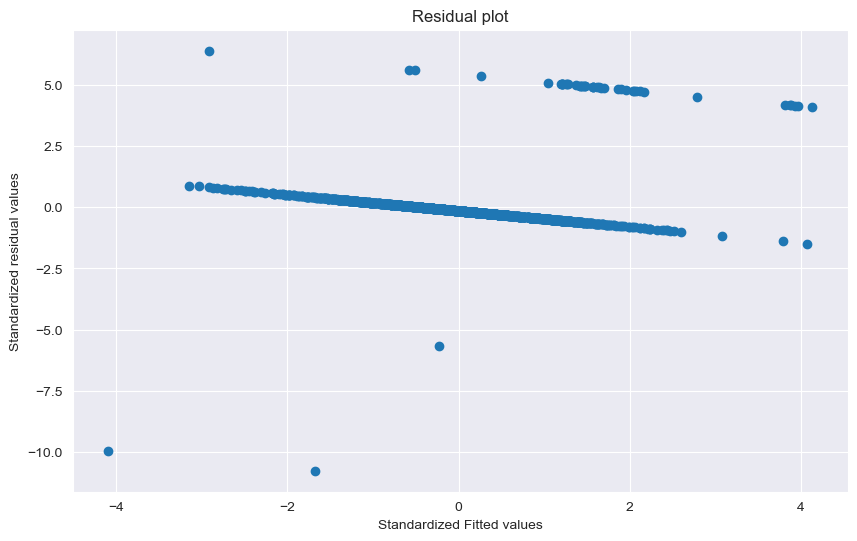

In [98]:
#Residual plot for Homoscedasticity
#No pattern is observed , if any pattern is observed it means Homoscedasticity is not satisfied.  
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()
plt.figure(figsize=(10,6))
plt.scatter(get_standardized_values
            (model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

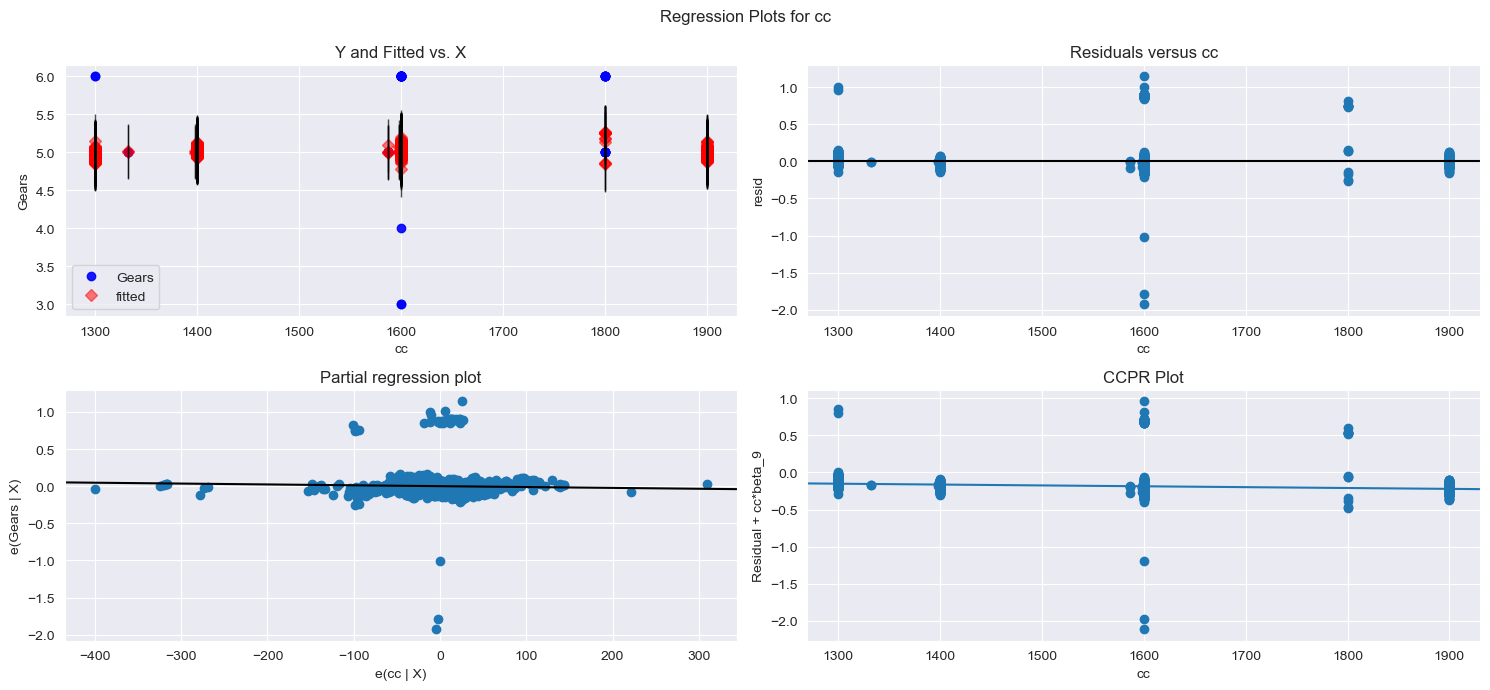

In [99]:
# Residual vs Regressors
fig = plt.figure(figsize=(15,7))
fig= sm.graphics.plot_regress_exog(model,"cc",fig=fig)
plt.show()
#A component residual residual plot adds a line indicating where the line of best fit lies.


In [100]:
# Model Diagnosis
#Identifying outliers in multi-dimensional space

In [101]:
# Cook's Distance
data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        1435 non-null   float64
 1   Age          1435 non-null   float64
 2   KM           1435 non-null   int64  
 3   HP           1435 non-null   float64
 4   Automatic    1435 non-null   int64  
 5   cc           1435 non-null   float64
 6   Doors        1435 non-null   int64  
 7   Cylinders    1435 non-null   int64  
 8   Gears        1435 non-null   int64  
 9   Weight       1435 non-null   float64
 10  Fuel_CNG     1435 non-null   bool   
 11  Fuel_Diesel  1435 non-null   bool   
 12  Fuel_Petrol  1435 non-null   bool   
dtypes: bool(3), float64(5), int64(5)
memory usage: 127.5 KB


In [102]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model.get_influence()
(C,_)= model_influence.cooks_distance
C

array([9.18744943e-05, 1.72520033e-04, 1.04504260e-04, ...,
       2.44763829e-06, 2.00379920e-05, 6.97443485e-06])

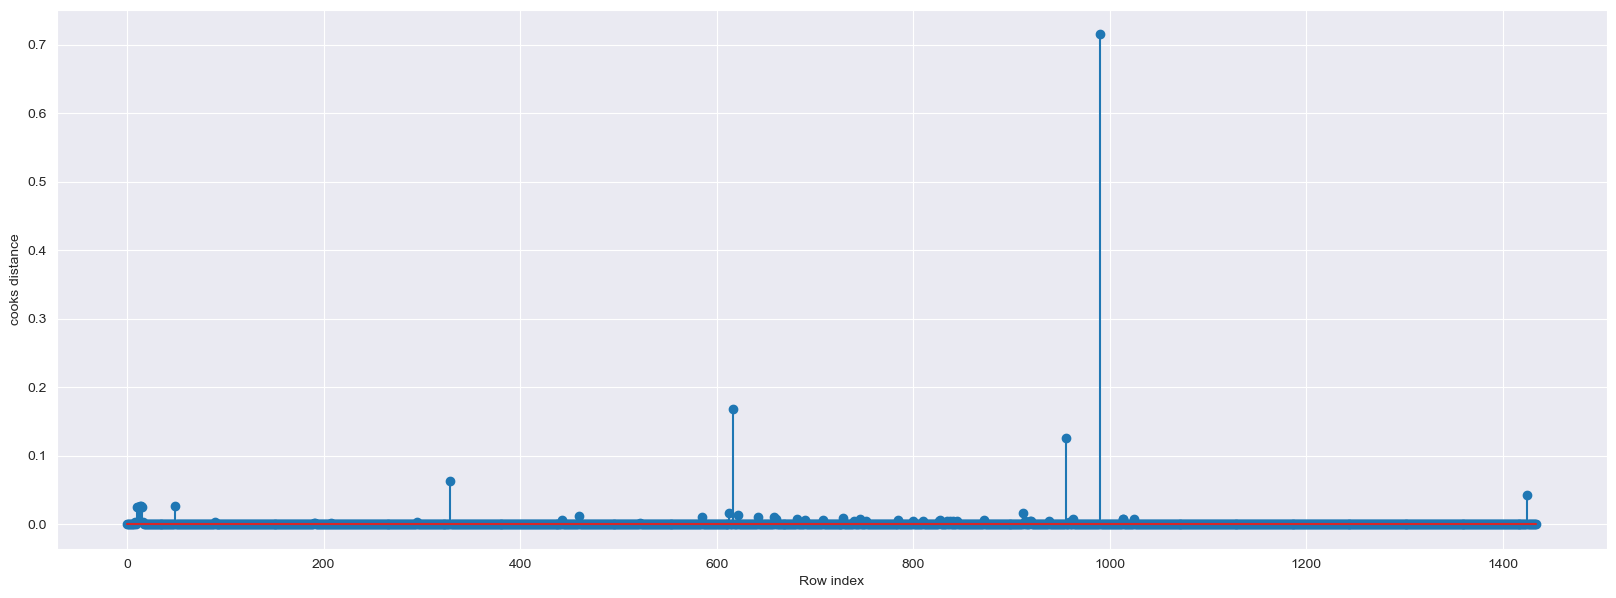

In [103]:
#Plotting the influencers values using stem plot(candle stick plot)
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data4)),np.round(C,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()
# Cooks distnace is considered high if value is greater than 0.5 and extreme if its is greater than 1.

In [128]:
# index and value of influencer where C is more than 0.5
(np.argmax(C),np.max(C))

(990, 0.7149647418510763)

In [129]:
# high influence points
data4.shape

(1435, 13)

In [106]:
k=data4.shape[1]
n=data4.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.029268292682926828

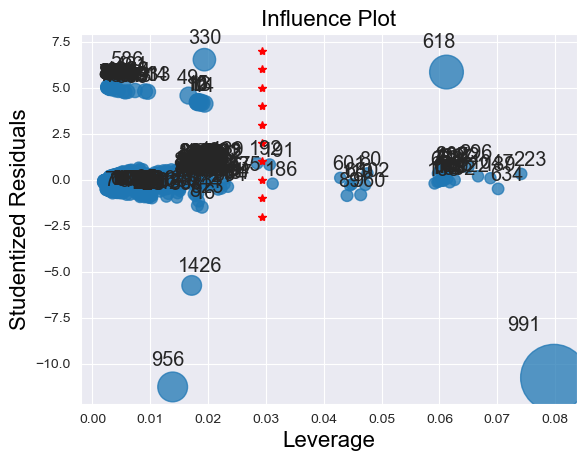

In [107]:
#plotting influence plot
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
influence_plot(model,alpha= 0.5)
y = [i for i in range (-2,8)]
x = [leverage_cutoff for i in range(10)]
plt.plot(x,y,'r*')
plt.show()

In [108]:
# Applying Lasso and ridge method on the model
import numpy as np
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split

# Define Lasso regression with alpha (regularization parameter)
lasso = Lasso(alpha=0.1)  # Adjust alpha as needed

# Train the Lasso model
lasso.fit(X_train, y_train)

# Predict on test data
y_pred_lasso = lasso.predict(X_test)

# Define Ridge regression with alpha
ridge = Ridge(alpha=1.0)  # Adjust alpha as needed

# Train the Ridge model
ridge.fit(X_train, y_train)

# Predict on test data
y_pred_ridge = ridge.predict(X_test)

# Evaluate model performance (e.g., using mean squared error)
from sklearn.metrics import mean_squared_error

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("Lasso MSE:", mse_lasso)
print("Ridge MSE:", mse_ridge)

# Access coefficients (weights) learned by the models
lasso_coef = lasso.coef_
ridge_coef = ridge.coef_

print("Lasso coefficients:", lasso_coef)
print("Ridge coefficients:", ridge_coef)

Lasso MSE: 0.04978720423356639
Ridge MSE: 0.04603668603401028
Lasso coefficients: [ 4.47413341e-06  0.00000000e+00  3.48642534e-07  1.43087287e-03
 -0.00000000e+00  2.81630760e-05 -0.00000000e+00  0.00000000e+00
 -1.00426068e-04  0.00000000e+00 -0.00000000e+00  0.00000000e+00]
Ridge coefficients: [ 1.05924646e-05  1.63227200e-03  4.10837048e-07  2.15053157e-03
 -8.94899812e-02 -6.08190833e-05 -4.58863771e-02  0.00000000e+00
  8.31888883e-04  2.82476396e-03 -1.28891821e-02  1.00644181e-02]


In [ ]:
# Interview Questions
# 1.What is Normalization & Standardization and how is it helpful?
# Normalization and standardization are techniques used in data preprocessing, especially in machine learning, to transform data into a common scale. While they both achieve this goal, they differ in their approach and specific applications.

# Normalization:

# Scales data to a specific user-defined range, typically between 0 and 1 (or -1 and 1).
# Makes no assumptions about the underlying data distribution.
# Useful for algorithms that rely on distances between data points, like k-nearest neighbors (KNN).
# Can be sensitive to outliers, as they can significantly affect the scaling factor.

# Standardization:

# Transforms data to have a mean of 0 and a standard deviation of 1 (also called z-score normalization).
# Often used when the data is assumed to be normally distributed (bell-shaped curve).
# Beneficial for algorithms sensitive to feature scale or that assume normality, like Logistic Regression and Support Vector Machines (SVMs).
# Less sensitive to outliers compared to normalization.

# Benefits of Normalization and Standardization:

# Improved Model Performance: By putting features on a similar scale, algorithms can converge faster and avoid giving undue weightage to features with larger scales.
# Reduced Bias: Normalization and standardization can help reduce bias arising from features with vastly different ranges.
# Better Interpretation: When features are on a similar scale, their coefficients in the model become more interpretable, providing insights into feature importance.
# In conclusion, both normalization and standardization are crucial steps in data preprocessing, and the choice between them depends on the specific algorithm and the data characteristics.

In [ ]:
# 2.What techniques can be used to address multicollinearity in multiple linear regression?

# Multicollinearity, the high correlation among independent variables in a regression model, can cause problems with interpreting results and coefficient estimates. Here are some techniques to address multicollinearity:

# 1. Dimensionality Reduction Techniques:

# Principal Component Analysis (PCA): This technique identifies a new set of uncorrelated variables (principal components) that explain most of the variance in the original features. You can then use these new, uncorrelated components in your regression model.
# Feature Selection: Analyze the correlation matrix to identify highly correlated features. You can then remove redundant features or use techniques like backward elimination to iteratively remove features that contribute least to the model while maintaining significance of other variables.

# 2. Regularization Techniques:

# Lasso Regression (L1 regularization): LASSO shrinks coefficient estimates towards zero, potentially setting some to zero entirely. This reduces the influence of correlated features and helps improve model interpretability.
# Ridge Regression (L2 regularization): Ridge regression shrinks coefficients but doesn't necessarily set them to zero. It reduces the variance of the coefficients, making the model less sensitive to multicollinearity but potentially reducing interpretability slightly.

# 3. Data Collection and Transformation:

# Gather More Data: If possible, collecting additional data points can sometimes reduce the impact of multicollinearity by introducing more variation.
# Centering and Scaling: Centering features by subtracting the mean and scaling by the standard deviation can help reduce the effect of collinearity, especially when combined with other techniques.
# Choosing the Right Technique:

# The best approach to address multicollinearity depends on your specific situation. Here are some general guidelines:

# If interpretability is crucial: Use dimensionality reduction or feature selection to identify the most important features.
# If model performance is the priority: Consider regularization techniques like Lasso or Ridge regression.
# For data-driven insights: Explore data collection or transformation techniques alongside other methods.
# It's often beneficial to combine these techniques. For instance, you can perform feature selection followed by applying Lasso regression for better model performance with some interpretability. Remember to evaluate the impact of each technique on your model's performance and coefficient estimates.